# ML for NLP2: Deep Learning
## Assignment 1


In [1]:
import os
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
import warnings
import nltk
nltk.download("popular")
import spacy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")
tqdm.pandas()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\molda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\molda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\molda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\molda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\molda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [2]:
#Install library for preprocessing
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\molda\appdata\local\temp\pip-req-build-wf_fjx13


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [3]:
import os 
os.getcwd()


'C:\\Users\\molda\\Downloads'

In [4]:
#Import datasets
fox_news = pd.read_csv('ML-for-NLP-main/Inputs/FoxNews_all_tweets.csv', delimiter=',') 
ny_times = pd.read_csv('ML-for-NLP-main/Inputs/nytimes_all_tweets.csv', delimiter=',') 

In [5]:
#if in colab
#fox_news = pd.read_csv('FoxNews_all_tweets.csv', delimiter=',') 
#ny_times = pd.read_csv('nytimes_all_tweets.csv', delimiter=',') 

In [6]:
fox_news.shape

(1329, 14)

In [7]:
ny_times.shape

(623, 14)

In [8]:
tweets=fox_news.append(ny_times)
tweets=tweets.reset_index(drop=True)
tweets.shape

(1952, 14)

In [9]:
tweets.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status
0,1367531,FoxNews,20946694,456439,NaN,NaN,FLASHBACK: Ex-intel officials claimed the Hunt...,2022-03-18 15:50:00+00:00,26,39,68,0,1504847596006821894,NaN
1,1367531,FoxNews,20946694,456439,NaN,NaN,Biden must do more to counter Putin's propagan...,2022-03-18 15:45:00+00:00,23,94,92,7,1504846338097221635,NaN
2,1367531,FoxNews,20946694,456439,NaN,NaN,NASCAR: What to expect from Atlanta's super ne...,2022-03-18 15:40:00+00:00,10,9,21,0,1504845079344820224,NaN
3,1367531,FoxNews,20946694,456439,NaN,NaN,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,1504843752426323990,NaN
4,1367531,FoxNews,20946694,456439,NaN,NaN,Transgender swimmer's NCAA championship win 'j...,2022-03-18 15:30:00+00:00,51,69,254,4,1504842564117024770,NaN


In [10]:
tweets["author_followers"].unique()

array([20946694, 20946696, 20946697, 52297192, 52297191, 52297187,
       52297193, 52297188], dtype=int64)

In [11]:
tweets["NYT"]=tweets["username"]=="nytimes"

In [12]:
tweets["mentions"]=tweets["text"].str.contains("@") #create dummy for @ mentions

In [13]:
tweets["mentions"].value_counts() #look how many columns contain it

False    1851
True      101
Name: mentions, dtype: int64

In [14]:
tweets["breaking"]=tweets["text"].str.contains("Breaking News|BREAKING:", case=False)

In [15]:
tweets[tweets["breaking"]==True]

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status,NYT,mentions,breaking
3,1367531,FoxNews,20946694,456439,NaN,NaN,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,1504843752426323990,NaN,False,False,True
321,1367531,FoxNews,20946694,456439,NaN,NaN,BREAKING: Judge orders Jussie Smollett be rele...,2022-03-16 22:54:50+00:00,170,1110,394,162,1504229732266692608,NaN,False,False,True
372,1367531,FoxNews,20946694,456439,NaN,NaN,BREAKING: President Biden calls Putin a 'war c...,2022-03-16 19:25:22+00:00,101,294,355,32,1504177021940809731,NaN,False,False,True
511,1367531,FoxNews,20946696,456439,NaN,NaN,BREAKING: Second gentleman Doug Emhoff tests p...,2022-03-15 22:41:27+00:00,29,98,97,7,1503863978551914497,NaN,False,False,True
559,1367531,FoxNews,20946696,456439,NaN,NaN,BREAKING: Biden Fed nominee Sarah Bloom Raskin...,2022-03-15 19:26:11+00:00,52,46,336,15,1503814839562604550,NaN,False,False,True
893,1367531,FoxNews,20946696,456439,NaN,NaN,BREAKING: Tom Brady coming back to play for Ta...,2022-03-13 23:40:43+00:00,106,116,639,35,1503154116226260992,NaN,False,False,True
917,1367531,FoxNews,20946696,456439,NaN,NaN,BREAKING NEWS: The former president revealed h...,2022-03-13 20:02:20+00:00,439,1987,2615,161,1503099157967511564,NaN,False,False,True
920,1367531,FoxNews,20946696,456439,NaN,NaN,BREAKING: Barack Obama tests positive for COVI...,2022-03-13 19:45:33+00:00,303,1289,1486,175,1503094937730101249,NaN,False,False,True
1381,807095,nytimes,52297192,466267,NaN,NaN,Breaking News: No. 2-seeded Kentucky lost in o...,2022-03-18 02:11:09+00:00,132,66,938,85,1504641526642712580,NaN,True,False,True
1387,807095,nytimes,52297192,466267,NaN,NaN,Breaking News: Moderna asked the FDA to author...,2022-03-18 00:50:10+00:00,325,84,998,82,1504621144707678213,NaN,True,False,True


In [16]:
tweets["hash"]=tweets["text"].str.contains("#")

In [17]:
tweets["hashtags"] = tweets[tweets["hash"]==True].text.apply(lambda x: [x for x in x.replace(".", " ").split(" ") if x.startswith("#")])


In [18]:
tweets[tweets["hash"]==True]

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status,NYT,mentions,breaking,hash,hashtags
1648,807095,nytimes,52297193,466267,NaN,NaN,"In Opinion\n\nCissi Wallin, a Swedish journali...",2022-03-15 15:15:05+00:00,78,31,291,14,1503751646924488704,NaN,True,False,False,True,[#MeToo]
1759,807095,nytimes,52297187,466267,NaN,NaN,The #CriticsChoiceAwards on Sunday might have ...,2022-03-14 13:25:05+00:00,23,25,119,1,1503361574018428937,NaN,True,False,False,True,[#CriticsChoiceAwards]
1790,807095,nytimes,52297187,466267,NaN,NaN,The #CriticsChoiceAwards prize for best pictur...,2022-03-14 02:10:29+00:00,92,31,496,22,1503191806900678657,NaN,True,False,False,True,[#CriticsChoiceAwards]
1791,807095,nytimes,52297187,466267,NaN,NaN,"The star of ""Squid Game,"" Lee Jung-jae, just w...",2022-03-14 01:59:31+00:00,137,21,1157,9,1503189045765099524,NaN,True,False,False,True,[#CriticsChoiceAwards]
1792,807095,nytimes,52297187,466267,NaN,NaN,"""Succession"" won best drama series at the #Cri...",2022-03-14 01:51:03+00:00,64,20,529,22,1503186917390696451,NaN,True,False,False,True,[#CriticsChoice]
1793,807095,nytimes,52297187,466267,NaN,NaN,"""Mare of Easttown"" just won the #CriticsChoice...",2022-03-14 01:48:30+00:00,113,38,1404,23,1503186276694073349,NaN,True,False,False,True,[#CriticsChoice]
1794,807095,nytimes,52297187,466267,NaN,NaN,Jessica Chastain won best actress at the #Crit...,2022-03-14 01:39:11+00:00,43,14,343,12,1503183931369267203,NaN,True,False,False,True,[#CriticsChoice]
1795,807095,nytimes,52297187,466267,NaN,NaN,Will Smith won the best actor #CriticsChoice a...,2022-03-14 01:32:38+00:00,157,26,1158,18,1503182282869415940,NaN,True,False,False,True,[#CriticsChoice]
1796,807095,nytimes,52297187,466267,NaN,NaN,"""Ted Lasso"" just won the #CriticsChoice award ...",2022-03-14 01:26:07+00:00,286,42,4555,84,1503180641675919362,NaN,True,False,False,True,[#CriticsChoice]


In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
stop_words = stopwords.words("english")
stopwords_final = stop_words + ["“","”",".s.","like","u","'s", "breaking", "news", "a", "flashback", "opinion", "watch live","’", "‘", "''", "``","—","us","says",".","u","'t","n"]

In [21]:
import re
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

def preprocessing_text(text):
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in string.punctuation]
    tokens = [token for token in tokens if token not in stopwords_final]
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

We want to remove information about users, otherwise it will be bad for topic modelling for example (it can give that the tweet topic is the user name

In [22]:
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [23]:
tweets["prep_text"]=tweets["text"].apply(lambda x: remove_users(x)).apply(lambda x: remove_URL(x)).apply(lambda x: preprocessing_text(x))

In [24]:
tweets.head(18)

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,tweet_id,reference_status,NYT,mentions,breaking,hash,hashtags,prep_text
0,1367531,FoxNews,20946694,456439,NaN,NaN,FLASHBACK: Ex-intel officials claimed the Hunt...,2022-03-18 15:50:00+00:00,26,39,68,0,1504847596006821894,NaN,False,False,False,False,NaN,ex-intel officials claimed hunter biden laptop...
1,1367531,FoxNews,20946694,456439,NaN,NaN,Biden must do more to counter Putin's propagan...,2022-03-18 15:45:00+00:00,23,94,92,7,1504846338097221635,NaN,False,False,False,False,NaN,biden must counter putin propaganda
2,1367531,FoxNews,20946694,456439,NaN,NaN,NASCAR: What to expect from Atlanta's super ne...,2022-03-18 15:40:00+00:00,10,9,21,0,1504845079344820224,NaN,False,False,False,False,NaN,nascar expect atlanta super new speedway
3,1367531,FoxNews,20946694,456439,NaN,NaN,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,1504843752426323990,NaN,False,False,True,False,NaN,biden xi discuss russia war ukraine 'other iss...
4,1367531,FoxNews,20946694,456439,NaN,NaN,Transgender swimmer's NCAA championship win 'j...,2022-03-18 15:30:00+00:00,51,69,254,4,1504842564117024770,NaN,False,False,False,False,NaN,transgender swimmer ncaa championship win 'jus...
5,1367531,FoxNews,20946694,456439,NaN,NaN,Fed's Bullard says interest rates need to rise...,2022-03-18 15:25:00+00:00,8,22,31,3,1504841304429137920,NaN,False,False,False,False,NaN,fed bullard interest rates need rise 3 quell i...
6,1367531,FoxNews,20946694,456439,NaN,NaN,Hunter Biden scandal: Media slowly acknowledge...,2022-03-18 15:20:00+00:00,103,85,280,6,1504840046272303105,NaN,False,False,False,False,NaN,hunter biden scandal media slowly acknowledges...
7,1367531,FoxNews,20946694,456439,NaN,NaN,Russia says Biden spouting 'personal insults' ...,2022-03-18 15:15:00+00:00,27,133,95,4,1504838788408774658,NaN,False,False,False,False,NaN,russia biden spouting 'personal insults putin ...
8,1367531,FoxNews,20946694,456439,NaN,NaN,Ukraine supply chain 'falling apart' amid grow...,2022-03-18 15:10:00+00:00,20,19,52,4,1504837529714921475,NaN,False,False,False,False,NaN,ukraine supply chain 'falling apart amid growi...
9,1367531,FoxNews,20946694,456439,NaN,NaN,Minnesota parents fear for son detained by Rus...,2022-03-18 15:05:00+00:00,30,25,66,0,1504836271847391248,NaN,False,False,False,False,NaN,minnesota parents fear son detained russian fo...


Let's look into our missing and zero values in this dataframe

In [25]:
#Function to define table with missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [26]:
missing_zero_values_table(tweets)

Your selected dataframe has 20 columns and 1952 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
author_description,0,1952,100.0,1952,100.0,float64
author_location,0,1952,100.0,1952,100.0,float64
reference_status,0,1952,100.0,1952,100.0,float64
hashtags,0,1943,99.5,1943,99.5,object


As we can see, the missing values we have in this database are for sure not missing at random. Basically 3 columns don't have any data at all, we just drop them. The column with hashtags we keep for now. Although apparently absolute most of the tweets didn't contain any hashtags

In [27]:
tweets = tweets.drop(labels = ['author_description', 'author_location','reference_status'], axis = 1)

In [28]:
tweets.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets', 'text',
       'created_at', 'retweets', 'replies', 'likes', 'quote_count', 'tweet_id',
       'NYT', 'mentions', 'breaking', 'hash', 'hashtags', 'prep_text'],
      dtype='object')

In [29]:
tweets["text"][1]

"Biden must do more to counter Putin's propaganda https://t.co/wzxpVAfryB"

In [30]:
tweets["prep_text"][1]

'biden must counter putin propaganda'

Let's create tf-idf

In [31]:
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b', stop_words=stopwords_final)
dtm_tfidf = vectorizer.fit_transform(tweets["prep_text"])
df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=vectorizer.get_feature_names())

In [32]:
df_tfidf

,abandon,abandoned,abbott,abc,abducted,ablaze,able,aboard,abortion,abortions,...,zealand,zelensky,zelenskyy,zero,zeynep,zients,zippy,zone,zones,zookeeper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part 2: Additional Feature Engineering

# Creating popularity and engagement scores

Let's define popularity score as: Popularity_score = Retweets + Likes.  

In [33]:
tweets.columns


Index(['author_id', 'username', 'author_followers', 'author_tweets', 'text',
       'created_at', 'retweets', 'replies', 'likes', 'quote_count', 'tweet_id',
       'NYT', 'mentions', 'breaking', 'hash', 'hashtags', 'prep_text'],
      dtype='object')

In [34]:
tweets.popularity_score = tweets.retweets + tweets.likes

Engagement is different from popularity in a fact that user engages with a tweet (so the user does smth). So let's define engagement score as replies + quote_count. Quote is different from retweet (according to tweeter) in a fact that it is retweet with added comments of the user

In [35]:
tweets.engagement_score = tweets.quote_count + tweets.replies

Engineering feature for most common hashtags doesn't make sense since the number of hashtags in this corpus is very small as we saw before

# Creating lenght of tweet feature

One important feature may be length of the tweet (probably one outlet usually has shorter tweets etc). So, let's generate feature for this

In [36]:
tweets.len_tweet = tweets.text.apply(len)


In [37]:
tweets.len_tweet.head

<bound method NDFrame.head of 0       118
1        72
2        80
3       131
4       110
       ... 
1947    297
1948    167
1949    264
1950    266
1951    173
Name: text, Length: 1952, dtype: int64>

Generating growth of followers on our sample also doesn't make sense because if we look in the data, it barely changed through this time perios. For each of the oulet it is just 3-5 unique values through this time period. For Fox News it changed from 20946694 to 20946697. For NY Times from 52297187 to 52297193, which is barely any difference

In [38]:
tweets.author_followers.unique()

array([20946694, 20946696, 20946697, 52297192, 52297191, 52297187,
       52297193, 52297188], dtype=int64)

# Part 3: Is there a follower- tweet relationship?

 The problem is that followers barely changed, so data does not allow to calculate such relationship

# Part 4: What are the most frequent topics tweeted about by each outlet? 

In [39]:
tweets.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets', 'text',
       'created_at', 'retweets', 'replies', 'likes', 'quote_count', 'tweet_id',
       'NYT', 'mentions', 'breaking', 'hash', 'hashtags', 'prep_text'],
      dtype='object')

We are asked to perform topic modelling for 2 outlets. So let's split data into two parts (NY Times and Fox News)

In [40]:
df = tweets[tweets['NYT'] == True].copy()


In [41]:
df.shape

(623, 17)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['prep_text']).toarray()


# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [43]:
tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
#Let's create the model with 10 topics
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [45]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [46]:
#Define the function to display topic modeling
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

Display topic for NY times

In [47]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,russian,56.3,russia,118.8,one,48.3,said,75.0,president,72.0,new,85.1,first,27.9,u,64.4,state,30.8,sunday,28.1
1,ukrainian,44.3,ukraine,87.0,said,28.6,people,39.3,ukraine,42.6,two,53.3,world,24.1,.s.,62.4,many,25.1,wednesday,21.8
2,city,30.8,war,52.4,monday,23.6,week,25.1,zelensky,32.1,york,35.1,years,20.0,.,40.1,killed,21.1,russian,5.7
3,kyiv,30.2,invasion,40.6,ukraine,21.9,would,16.8,biden,28.2,said,16.0,since,18.5,biden,10.0,tuesday,12.7,military,4.5
4,ukraine,21.0,russian,38.2,war,14.4,officials,16.5,country,26.8,world,11.1,country,18.1,officials,7.7,people,9.4,according,4.4
5,according,20.8,could,33.1,kyiv,13.9,city,11.4,volodymyr,25.1,city,11.0,covid,16.0,president,7.2,war,6.5,said,0.4
6,killed,16.1,since,14.9,ukrainian,9.9,covid,9.2,said,23.7,years,9.3,one,9.9,would,7.2,would,5.3,ukraine,0.2
7,said,12.5,said,8.5,russia,8.2,since,3.0,wednesday,10.4,tuesday,5.6,two,2.4,tuesday,5.3,according,4.1,since,0.1
8,military,10.4,military,3.4,country,2.4,tuesday,0.1,russian,9.1,people,3.7,u,1.8,russia,4.3,two,1.6,country,0.1
9,people,9.9,years,1.9,killed,0.1,two,0.1,war,7.5,according,0.1,.s.,1.8,military,3.3,said,0.1,one,0.1


Now let's do the same for FOX news

In [48]:
df= tweets[tweets['NYT'] == False]

In [49]:
df.shape

(1329, 17)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['prep_text']).toarray()


# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [51]:
#Let's create the model with 10 topics
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [52]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [53]:
#Define the function to display topic modeling
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [54]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,new,64.1,say,35.1,biden,194.7,putin,96.1,ukraine,153.7,russia,128.8,zelenskyy,65.1,russian,123.1,war,56.8,covid,36.1
1,gas,50.1,police,29.1,.,42.9,former,31.0,war,54.6,ukraine,32.1,ukrainian,50.1,ukraine,18.3,russia,42.4,report,32.9
2,prices,34.1,officials,28.1,gop,33.1,ukraine,26.3,invasion,31.7,invasion,12.5,president,19.5,kyiv,18.1,energy,37.1,time,25.1
3,oil,27.1,trump,17.1,may,19.1,house,22.1,state,29.1,.,11.3,war,16.5,war,0.4,amid,33.2,calls,8.6
4,calls,1.4,former,6.2,trump,14.1,president,12.1,china,21.1,kyiv,8.1,congress,16.2,calls,0.1,-ukraine,33.1,house,6.1
5,gop,0.1,report,5.3,calls,0.1,calls,8.5,amid,20.0,president,7.7,calls,3.5,invasion,0.1,biden,10.5,may,3.6
6,biden,0.1,ukraine,0.1,ukraine,0.1,china,5.1,russia,0.1,may,2.6,kyiv,0.1,ukrainian,0.1,congress,10.0,china,0.1
7,energy,0.1,biden,0.1,energy,0.1,may,0.1,.,0.1,china,0.1,ukraine,0.1,may,0.1,calls,9.5,russian,0.1
8,state,0.1,kyiv,0.1,president,0.1,trump,0.1,biden,0.1,calls,0.1,russia,0.1,officials,0.1,house,0.1,.,0.1
9,amid,0.1,.,0.1,amid,0.1,biden,0.1,russian,0.1,biden,0.1,invasion,0.1,state,0.1,oil,0.1,russia,0.1


As we can see, topics are quite close. Both outlets are talking a lot about war in Ukraine. However, we can see that FOX news also talks about gas and energy prices (which although not about war, but very closely related)

# Part 5: Is there a relationship between the sentiment of the tweet and the outlet?

In [55]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [56]:
tweets['polarity_score'] = tweets['prep_text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
tweets['neutral'] = tweets['prep_text'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
tweets['negative'] = tweets['prep_text'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
tweets['positive'] = tweets['prep_text'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

In [57]:
tweets['sentiment']=''
tweets.loc[tweets.polarity_score>0.05,'sentiment']='Positive'
tweets.loc[(tweets.polarity_score>-0.05) & (tweets.polarity_score<0.05),'sentiment']='Neutral'
tweets.loc[tweets.polarity_score<-0.05,'sentiment']='Negative'

Let's make a density rather than countplot:

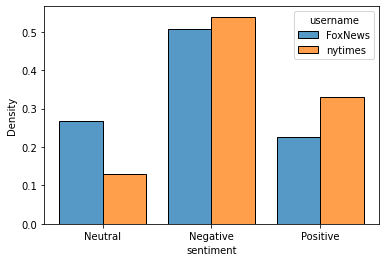

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

ax = sns.histplot(x = tweets['sentiment'], hue=tweets['username'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)

Negative sentiment prevails in both FoxNews and NYT. NYT however a bit more positive, while FoxNews is more neutral.

We also check the text without preprocessing:

In [59]:
tweets['polarity_score'] = tweets['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
tweets['neutral'] = tweets['text'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
tweets['negative'] = tweets['text'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
tweets['positive'] = tweets['text'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

In [60]:
tweets['sentiment']=''
tweets.loc[tweets.polarity_score>0.05,'sentiment']='Positive'
tweets.loc[(tweets.polarity_score>-0.05) & (tweets.polarity_score<0.05),'sentiment']='Neutral'
tweets.loc[tweets.polarity_score<-0.05,'sentiment']='Negative'

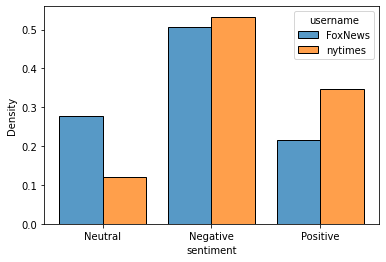

In [61]:
ax = sns.histplot(x = tweets['sentiment'], hue=tweets['username'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)

it did not change much.

Negative sentiment prevails in both FoxNews and NYT. NYT however a bit more positive, while FoxNews is more neutral.

It was also interesting to look at the Polarity and Subjectivity scores given by the TextBlob.

Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [62]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Apply a function along an axis of the DataFrame.
tweets['polarity'] = tweets['prep_text'].apply(pol)
tweets['subjectivity'] = tweets['prep_text'].apply(sub)
tweets.head()

,author_id,username,author_followers,author_tweets,text,created_at,retweets,replies,likes,quote_count,...,hash,hashtags,prep_text,polarity_score,neutral,negative,positive,sentiment,polarity,subjectivity
0,1367531,FoxNews,20946694,456439,FLASHBACK: Ex-intel officials claimed the Hunt...,2022-03-18 15:50:00+00:00,26,39,68,0,...,False,NaN,ex-intel officials claimed hunter biden laptop...,0.0000,1.000,0.000,0.000,Neutral,0.000000,0.000000
1,1367531,FoxNews,20946694,456439,Biden must do more to counter Putin's propagan...,2022-03-18 15:45:00+00:00,23,94,92,7,...,False,NaN,biden must counter putin propaganda,-0.2500,0.800,0.200,0.000,Negative,-0.100000,0.100000
2,1367531,FoxNews,20946694,456439,NASCAR: What to expect from Atlanta's super ne...,2022-03-18 15:40:00+00:00,10,9,21,0,...,False,NaN,nascar expect atlanta super new speedway,0.5994,0.698,0.000,0.302,Positive,0.234848,0.560606
3,1367531,FoxNews,20946694,456439,"BREAKING: Biden, Xi discuss Russia's war again...",2022-03-18 15:34:43+00:00,33,71,87,3,...,False,NaN,biden xi discuss russia war ukraine 'other iss...,-0.5994,0.813,0.187,0.000,Negative,-0.125000,0.375000
4,1367531,FoxNews,20946694,456439,Transgender swimmer's NCAA championship win 'j...,2022-03-18 15:30:00+00:00,51,69,254,4,...,False,NaN,transgender swimmer ncaa championship win 'jus...,0.7717,0.599,0.000,0.401,Positive,0.542857,0.467857


In [63]:
tweets["username"].unique()

array(['FoxNews', 'nytimes'], dtype=object)

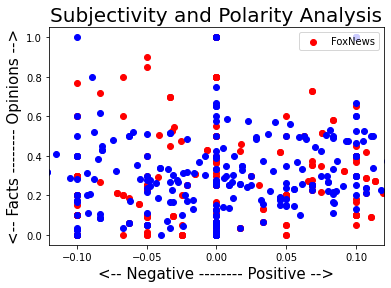

In [64]:
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [10, 8] 

for index, username in zip(tweets.index, tweets.username):
    x = tweets.polarity.loc[index]
    y = tweets.subjectivity.loc[index]
    if username.startswith("Fox"):
        plt.scatter(x, y, color='red', label="FoxNews")
    else: 
        plt.scatter(x, y, color='blue', label="NYT")
    plt.xlim(-.12, .12) 
    plt.legend(["FoxNews"],loc=1)


plt.title('Subjectivity and Polarity Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Visually there does not seem to be a significant difference between NYT and FoxNews in terms of subjectivity and polarity.

# Part 6: Can we predict the outlet by the text of the tweet? 

In [65]:
y= tweets["NYT"]

In [66]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: NYT, dtype: bool

## CountVectorizer

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b', stop_words=stopwords_final)
dtm_count = vectorizer.fit_transform(tweets["prep_text"])
df_count = pd.DataFrame(dtm_count.toarray(), columns=vectorizer.get_feature_names())

In [68]:
df_count.shape

(1952, 6302)

In [69]:
X=df_count

<AxesSubplot:xlabel='NYT', ylabel='count'>

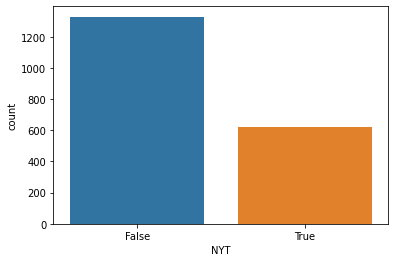

In [70]:
import seaborn as sns
#plt.rcParams['figure.figsize']=[8,6]
sns.countplot(y)


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=2009,
                                                    stratify=y)

### Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [73]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_pred)

array([[237,  29],
       [ 20, 105]], dtype=int64)

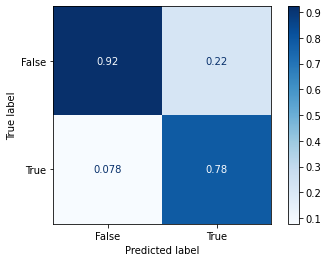

In [75]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.89      0.91       266
        True       0.78      0.84      0.81       125

    accuracy                           0.87       391
   macro avg       0.85      0.87      0.86       391
weighted avg       0.88      0.87      0.88       391



We have been trying to predict whether the outlet is NYT (our y variable). In the confusion matrix and classification report: False means that the outlet is FoxNews and True means that the outlet is NY Times.
The Multinomial Naive Bayes gave the following results:
Precision for FoxNews was 0.92 representing the proportion of predicted FoxNews tweets which were actually correct (237 out of 257 values predicted to be FoxNews were correctly predicted). Precision for NYT was 0.78 (105 out of 134 values predicted to be NYT were correctly predicted). <br><br>  Recall for FoxNews was 0.89, meaning that 89% of actual FoxNews tweets were correctly classified (there were 237 correct predictions out of 266 actual FoxNews tweets). Recall for NYT was 0.84, meaning that 84% of actual NYT tweets were correctly classified (there were 105 correct predictions out of 125 actual NYT tweets).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was slightly better for FoxNews as suggested by f1-score of 0.91, and 0.81 for NYT.
<br><br>  Support is just a number of actual FoxNews and NYTs in y_test.
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

#### GaussianNB with hyperparameter tuning

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [78]:
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Test set score: 0.90
Best parameters: {'var_smoothing': 0.005336699231206307}
Best cross-validation score: 0.90
Best estimator:
GaussianNB(var_smoothing=0.005336699231206307)
Accuracy on the testing set: 0.9003


In [79]:
y_pred = grid_search.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[257,   9],
       [ 30,  95]], dtype=int64)

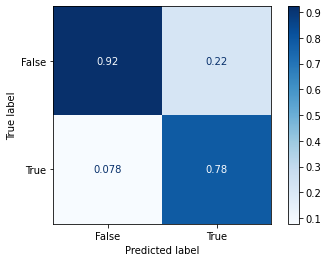

In [80]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.97      0.93       266
        True       0.91      0.76      0.83       125

    accuracy                           0.90       391
   macro avg       0.90      0.86      0.88       391
weighted avg       0.90      0.90      0.90       391



The Gaussian Naive Bayes with hyperparameter tuning gave the following results:
Precision for FoxNews was 0.90 representing the proportion of predicted FoxNews tweets which were actually correct (257 out of 287 values predicted to be FoxNews were correctly predicted). Precision for NYT was 0.91 (95 out of 104 values predicted to be NYT were correctly predicted). <br><br>  Recall for FoxNews was 0.97, meaning that 97% of actual FoxNews tweets were correctly classified (there were 257 correct predictions out of 266 actual FoxNews tweets). Recall for NYT was 0.76, meaning that 76% of actual NYT tweets were correctly classified (there were 95 correct predictions out of 125 actual NYT tweets).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was slightly better for FoxNews as suggested by f1-score of 0.93, and 0.83 for NYT.
<br><br>  Gaussian Naive Bayes with hyperparameter tuning performed better than Multinomial Naive Bayes.
<br><br>  Support is just a number of actual FoxNews and NYTs in y_test.
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

### Logistic

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [83]:
confusion_matrix(y_test, y_pred)

array([[265,   1],
       [ 34,  91]], dtype=int64)

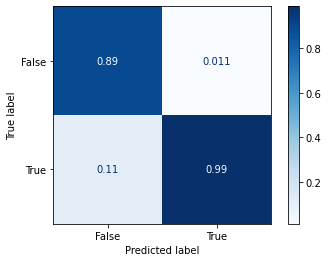

In [84]:
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94       266
        True       0.99      0.73      0.84       125

    accuracy                           0.91       391
   macro avg       0.94      0.86      0.89       391
weighted avg       0.92      0.91      0.91       391



The Logistic Regression gave the following results:
Precision for FoxNews was 0.89 representing the proportion of predicted FoxNews tweets which were actually correct (265 out of 299 values predicted to be FoxNews were correctly predicted). Precision for NYT was 0.99 (91 out of 92 values predicted to be NYT were correctly predicted). <br><br>  Recall for FoxNews was 1.00, meaning that 100% of actual FoxNews tweets were correctly classified (there were 265 correct predictions out of 266 actual FoxNews tweets, so there was rounding up). Recall for NYT was 0.73, meaning that 73% of actual NYT tweets were correctly classified (there were 91 correct predictions out of 125 actual NYT tweets).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was slightly better for FoxNews as suggested by f1-score of 0.94, and 0.84 for NYT.
<br><br>  Logistic Regression performed better than the Naive Bayes Classifier.
<br><br>  Support is just a number of actual FoxNews and NYTs in y_test.
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.
<br><br>  Let's try hyperparameter tuning in Logistic Regression:

In [86]:
logit = LogisticRegression()

In [87]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': (1, 2, 3, 4)
}

In [88]:
clf = GridSearchCV(logit, hyperparameters, n_jobs=-1, cv = 5)

In [89]:
%%time
clf.fit(X_train, y_train)

Wall time: 15.2 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (1, 2, 3, 4), 'penalty': ['l1', 'l2']})

In [90]:
clf.best_params_

{'C': 4, 'penalty': 'l2'}

In [91]:
clf.best_score_

0.9058183828950602

In [92]:
y_pred = clf.predict(X_test)

In [93]:
confusion_matrix(y_test, y_pred)

array([[264,   2],
       [ 30,  95]], dtype=int64)

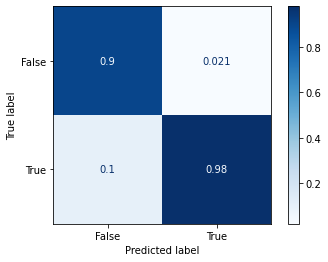

In [94]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       266
        True       0.98      0.76      0.86       125

    accuracy                           0.92       391
   macro avg       0.94      0.88      0.90       391
weighted avg       0.92      0.92      0.92       391



The Logistic Regression with hyperparameter tuning gave the following results:
Precision for FoxNews was 0.90 representing the proportion of predicted FoxNews tweets which were actually correct (264 out of 294 values predicted to be FoxNews were correctly predicted). Precision for NYT was 0.98 (95 out of 97 values predicted to be NYT were correctly predicted). <br><br>  Recall for FoxNews was 0.99, meaning that 99% of actual FoxNews tweets were correctly classified (there were 264 correct predictions out of 266 actual FoxNews tweets). Recall for NYT was 0.76, meaning that 76% of actual NYT tweets were correctly classified (there were 95 correct predictions out of 125 actual NYT tweets).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was slightly better for FoxNews as suggested by f1-score of 0.94, and 0.86 for NYT.
<br><br>  Logistic Regression with hyperparameter tuning performed slightly better in predicting NYT tweets, without damaging the results for FoxNews than simple Logistic Regression.
<br><br>  Support is just a number of actual FoxNews and NYTs in y_test.
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

### SVC

In [96]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [97]:
y_pred = clf.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.94       266
        True       0.96      0.74      0.84       125

    accuracy                           0.91       391
   macro avg       0.92      0.86      0.89       391
weighted avg       0.91      0.91      0.90       391



At this point it is slightly worse than the Logistic Regression with hyperparameter tuning, let's also try tuning C-hyperparameter.

SVC with hyperparameter tuning:

In [99]:
param_grid = {'C': np.logspace(-2, 2, 6)}
print(param_grid)

{'C': array([1.00000000e-02, 6.30957344e-02, 3.98107171e-01, 2.51188643e+00,
       1.58489319e+01, 1.00000000e+02])}


In [100]:
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

Test set score: 0.92
Best parameters: {'C': 0.3981071705534973}
Best cross-validation score: 0.91
Best estimator:
SVC(C=0.3981071705534973, kernel='linear')
Accuracy on the testing set: 0.9182


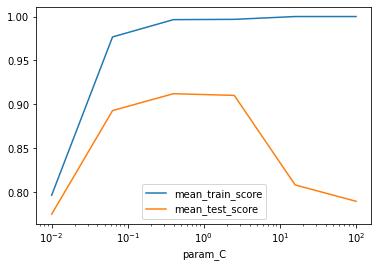

In [101]:
results = pd.DataFrame(grid_search.cv_results_)
results.plot('param_C', 'mean_train_score', ax=plt.gca())
results.plot('param_C', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")

In [102]:
final_model = SVC(kernel='linear', C=grid_search.best_params_['C'])
final_model.fit(X_train, y_train)


SVC(C=0.3981071705534973, kernel='linear')

In [103]:
y_pred = final_model.predict(X_test)

In [104]:
confusion_matrix(y_test, y_pred)

array([[263,   3],
       [ 29,  96]], dtype=int64)

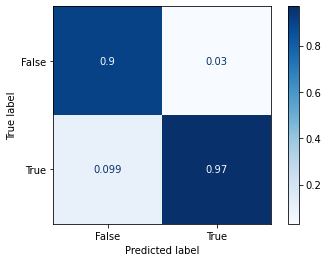

In [105]:
plot_confusion_matrix(final_model, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       266
        True       0.97      0.77      0.86       125

    accuracy                           0.92       391
   macro avg       0.94      0.88      0.90       391
weighted avg       0.92      0.92      0.92       391



The Support Vector Classifier with hyperparameter tuning gave the following results:
Precision for FoxNews was 0.90 representing the proportion of predicted FoxNews tweets which were actually correct (263 out of 292 values predicted to be FoxNews were correctly predicted). Precision for NYT was 0.97 (96 out of 99 values predicted to be NYT were correctly predicted). <br><br>  Recall for FoxNews was 0.99, meaning that 99% of actual FoxNews tweets were correctly classified (there were 263 correct predictions out of 266 actual FoxNews tweets). Recall for NYT was 0.77, meaning that 77% of actual NYT tweets were correctly classified (there were 96 correct predictions out of 125 actual NYT tweets).
<br><br>  F1-score is a harmonic mean of precision and recall, representing a rate of performance. In this case, model was slightly better for FoxNews as suggested by f1-score of 0.94, and 0.86 for NYT.
<br><br>  SVC with hyperparameter tuning performed similarly to the Logistic Regression with hyperparameter tuning.
<br><br>  Support is just a number of actual FoxNews and NYTs in y_test.
<br><br>  Macro average for the precision and recall score is just the harmonic mean.
<br><br>  Weighted average is just the average metric (precision and recall) weighted by the support/size-of-sample.

Overall, SVC and Logistic Regression gave similar results, while Naive Bayes was slightly worse. Hyperparameter tuning allowed to slightly improve the performance of each classifier. The reason for the worse performance of the Naive Bayes could be that the assumption that the posterior probability that every element is independent of each other fails to hold its significance, i.e. it cannot learn interactions between features because of the class-condition independence assumption, resulting in the loss in accuracy. Rather than taking a probabilistic approach SVM works on the geometric interpretation of the problems. The text being a high dimension problem fits right into its core since the model is independent of dimensions. It also take into account the interaction between the term to understand a “dense” concept which Naive Bayes fails due to its assumption but since SVM has the ability to plug a number of kernels which include Linear kernel can easily process on such predictors and separate out the independent term to max distance. Logistic Regression was also good as it made a prediction for the probability using a direct functional form. 

# Part 7: Do the usual word analogies hold in this sample?

As a matter of fact, they do. In the next question, by the help of those we created representative tweets. The only cases where it would not work is when we have a names. For example, when we found the most representative tweet for New York time, we could not find embedding for OXXXIMORON (stage name for a Russian rapper). As, logically, this word is not on the nlp.vocab.

# Part 8: Create the most representative tweet by outlet 

In [107]:
nlp = spacy.load('en_core_web_lg')


We need to vectorize our text. We define the following function to do the job. However, one thing needs to be noted that `doc.vector` does not work if there is a missing data. So we will check if there is a missing observation before we apply it.

In [108]:
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [109]:
tweets['vec']=tweets['prep_text'].apply(lambda x: get_vec(x))

We split the sample by the outlet, so that we can do the analysis. 

In [110]:
tweets_nyt=tweets[tweets['NYT']==True]#New York Times sample
tweets_nyt=tweets_nyt.reset_index()

tweets_fox=tweets[tweets['NYT']==False]#FoxNews sample


In order to find the most representative tweet we need to calculate the average vector for each sample.

In [111]:
avg_nyt=np.mean(tweets_nyt['vec'])
avg_fox=np.mean(tweets_fox['vec'])

We have the average vector and the vectors for all tweets. We can define the loss function and see which vector is the closest to our average vector. We chose Mean Squared Errors as a loss function.

In [112]:
def loss_sim(tweets,avrg):
    losses=[]
    for i in tweets:
        losses.append(np.square(np.subtract(i,avrg)).mean())
    minimum_index=losses.index(min(losses))
    return minimum_index

print('The most representative tweet of the New York Times is:',str(tweets_nyt['text'][loss_sim(tweets_nyt['vec'],avg_nyt)]))

print('The most representative tweet of the FoxNews is:',str(tweets_fox['text'][loss_sim(tweets_fox['vec'],avg_fox)]))


The most representative tweet of the New York Times is: Oxxxymiron, also known as Miron Fyodorov, one of Russia's most popular rappers, announced a series of anti-war charity concerts, which will happen outside Russia because of "total censorship." The shows' proceeds will help those fleeing Ukraine, he said. https://t.co/SDPhrqPRCn
The most representative tweet of the FoxNews is: ‘CREATING MORE PROBLEMS’: Ukrainian-born congresswoman Victoria Spartz says the actions of the Biden administration throughout the Russian invasion are contributing to previous failures and ultimately hurting the American people. https://t.co/2jsr0hWH47 https://t.co/eCWoXZGASC


Now the next thing is to create a new tweet based on these best representative tweets

In [113]:
original_tweet=str(tweets_nyt['text'][loss_sim(tweets_nyt['vec'],avg_nyt)])
words= str(tweets_nyt['text'][loss_sim(tweets_nyt['vec'],avg_nyt)]).split()

In [114]:
similar_tweet=[]
for word in words:
    try:
        ms = nlp.vocab.vectors.most_similar(np.asarray([nlp.vocab.vectors[nlp.vocab.strings[word]]]), n=10)
        similar_word = [nlp.vocab.strings[w] for w in ms[0][0]]
        similar_tweet.append(similar_word[5])
    except:
        pass

In [115]:
print('Similar: ')
print(similar_tweet)
print('Original tweet: ')
print(original_tweet)

Similar: 
['WHICH', 'Called', 'WEll', 'hanny', 'One', 'The', 'most', 'most', 'announce', 'another', 'Episodes', 'The', 'antiwar', 'CHARITIES', 'That', 'bE', 'happens', 'INside', 'UKRAINE', 'buT', 'The', 'THe', 'funds', 'bE', 'helping', 'these', 'Fled', 'Him', 'SAY.']
Original tweet: 
Oxxxymiron, also known as Miron Fyodorov, one of Russia's most popular rappers, announced a series of anti-war charity concerts, which will happen outside Russia because of "total censorship." The shows' proceeds will help those fleeing Ukraine, he said. https://t.co/SDPhrqPRCn


In [116]:
representative_tweet=' '.join(word for word in similar_tweet)
print('The most representative tweet for New York Times is:', representative_tweet)

The most representative tweet for New York Times is: WHICH Called WEll hanny One The most most announce another Episodes The antiwar CHARITIES That bE happens INside UKRAINE buT The THe funds bE helping these Fled Him SAY.


In [117]:
original_tweet=str(tweets_fox['text'][loss_sim(tweets_fox['vec'],avg_fox)])
words= str(tweets_fox['text'][loss_sim(tweets_fox['vec'],avg_fox)]).split()

In [118]:
similar_tweet=[]
for word in words:
    try:
        ms = nlp.vocab.vectors.most_similar(np.asarray([nlp.vocab.vectors[nlp.vocab.strings[word]]]), n=10)
        similar_word = [nlp.vocab.strings[w] for w in ms[0][0]]
        similar_tweet.append(similar_word[5])
    except:
        pass

In [119]:
print('Similar: ')
print(similar_tweet)
print('Original tweet: ')
print(original_tweet)

Similar: 
['less', 'congressman', 'sydney', 'Said', 'THe', 'action', 'The', 'THe', 'mccain', 'ADMINISTRATIONS', 'Across', 'THe', 'Ukrainian', 'INVADING', 'arE', 'Contribute', 'Able', 'EARLIER', 'failure', 'anD', 'Eventually', 'Hurt', 'THe', 'AMerica', 'Person.']
Original tweet: 
‘CREATING MORE PROBLEMS’: Ukrainian-born congresswoman Victoria Spartz says the actions of the Biden administration throughout the Russian invasion are contributing to previous failures and ultimately hurting the American people. https://t.co/2jsr0hWH47 https://t.co/eCWoXZGASC


In [120]:
representative_tweet=' '.join(word for word in similar_tweet)
print('The most representative tweet for FoxNews is:', representative_tweet)

The most representative tweet for FoxNews is: less congressman sydney Said THe action The THe mccain ADMINISTRATIONS Across THe Ukrainian INVADING arE Contribute Able EARLIER failure anD Eventually Hurt THe AMerica Person.


# Bonus Part: Create at least two own explorations

## Lasso: Guessing the outlet from the vectors we derived

We will perform this task using different models, starting with `Lasso`.

In [121]:
tweets.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets', 'text',
       'created_at', 'retweets', 'replies', 'likes', 'quote_count', 'tweet_id',
       'NYT', 'mentions', 'breaking', 'hash', 'hashtags', 'prep_text',
       'polarity_score', 'neutral', 'negative', 'positive', 'sentiment',
       'polarity', 'subjectivity', 'vec'],
      dtype='object')

In [122]:
X = tweets['vec'].to_numpy()
X = X.reshape(-1, 1)
X.shape

(1952, 1)

In [123]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)
X.shape

(1952, 300)

In [124]:
y=tweets['NYT'].to_numpy()
y.shape

(1952,)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 3123, stratify = y)
X_train.shape, X_test.shape

((1268, 300), (684, 300))

In [126]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)

In [127]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format (lasso.score(X_test, y_test)))

Training set score: 0.00
Test set score: -0.00


In [128]:
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0 ))) 

Number of features used: 0


In [129]:
lasso001 = Lasso(alpha=0.01)
lasso001.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format (lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0 )))

Training set score: 0.20
Test set score: 0.18
Number of features used: 9


In [130]:
lasso10 = Lasso(alpha=10)
lasso10.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format (lasso10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10.coef_ != 0 )))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


Text(0, 0.5, 'Coefficient magnitude')

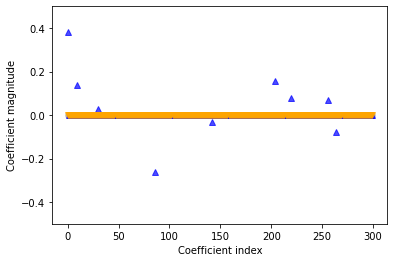

In [131]:
plt.plot(lasso.coef_ , 'o', color="gray", alpha=0.3, label = "Lasso alpha=1" ) 
plt.plot(lasso001.coef_ , '^', color="blue" , alpha=0.7, label = "Lasso alpha=0.01" ) 
plt.plot(lasso10.coef_ , 'v', color="orange", alpha=0.8 , label = "Lasso alpha=10" )
plt.ylim (-0.5 , 0.5 ) 
plt.xlabel("Coefficient index" ) 
plt.ylabel ("Coefficient magnitude" ) 

In [132]:
alpha=[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000]
score=[]
for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train) 
    score.append(lasso.score(X_test, y_test))

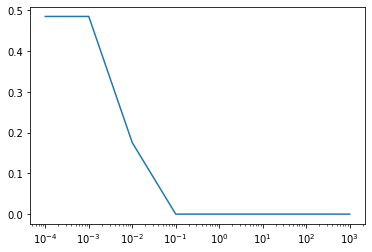

In [133]:
plt.plot(alpha, score)
plt.xscale("log")

The smaller `alpha` is, the better `Lasso` fits our data. With that logic, the best model for our data is when `alpha` is equal to `0`. Which also happens to be `Linear Regression`. Let's consider both cases:

In [134]:
#LASSO when alpha=0
lasso0 = Lasso(alpha=0)
lasso0.fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso0.score(X_train, y_train))) 
print("Test set score: {:.2f}".format (lasso0.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0.coef_ != 0 )))

Training set score: 0.67
Test set score: 0.44
Number of features used: 300


## Linear Regression

Training set score: 0.67
Test set score: 0.44
Number of features used: 300


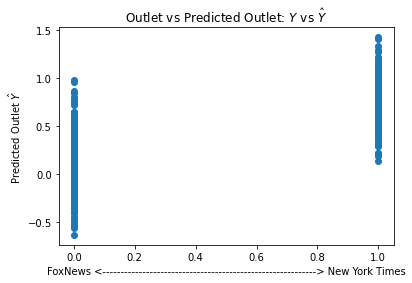

In [135]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
residuals_train = y_train - y_pred
plt.scatter(y_train, y_pred)
plt.xlabel("FoxNews <-----------------------------------------------------------> New York Times")
plt.ylabel("Predicted Outlet $\hat{Y}$")
plt.title("Outlet vs Predicted Outlet: $Y$ vs $\hat{Y}$")
print ("Training set score: {:.2f}".format(reg.score (X_train , y_train )))
print ("Test set score: {:.2f}".format (reg.score(X_test , y_test ))) 
print("Number of features used: {}".format(np.sum(reg.coef_ != 0 )))

We got the same results

# Support Vector Machine

In [136]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.92      0.91       466
        True       0.81      0.78      0.79       218

    accuracy                           0.87       684
   macro avg       0.85      0.85      0.85       684
weighted avg       0.87      0.87      0.87       684



## Grid Search Cross Validation for Hyperparameters Tuning

Test set score: 0.88
Best parameters: {'C': 4, 'penalty': 'l2'}
Best cross-validation score: 0.89
Best estimator:
LogisticRegression(C=4, max_iter=10000)
Accuracy on the testing set: 0.8845
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       466
        True       0.81      0.78      0.79       218

    accuracy                           0.87       684
   macro avg       0.85      0.85      0.85       684
weighted avg       0.87      0.87      0.87       684



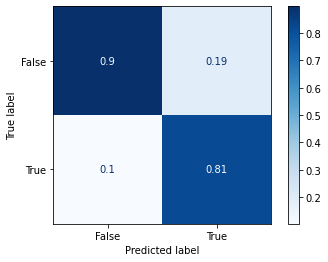

In [137]:
logit = LogisticRegression(solver='lbfgs',max_iter=10000)
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': (1, 2, 3, 4)
}
grid_search = GridSearchCV(logit, hyperparameters, n_jobs=-1, cv = 5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

## Ridge 

In [138]:
ridge = Ridge() 
ridge.fit(X_train, y_train)
print ("Training set score: {:.2f}".format(ridge.score (X_train , y_train )))
print ("Test set score: {:.2f}".format (ridge.score(X_test , y_test ))) 

Training set score: 0.65
Test set score: 0.50


## Logistic Regression

In [139]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print ("Training set score: {:.2f}".format(clf.score (X_train , y_train )))
print ("Test set score: {:.2f}".format (clf.score(X_test , y_test ))) 


Training set score: 0.93
Test set score: 0.89


In [140]:
y_pred = clf.predict(X_test)

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.94      0.92       466
        True       0.85      0.79      0.82       218

    accuracy                           0.89       684
   macro avg       0.88      0.86      0.87       684
weighted avg       0.89      0.89      0.89       684



In [142]:
confusion_matrix(y_test,y_pred)

array([[436,  30],
       [ 45, 173]], dtype=int64)

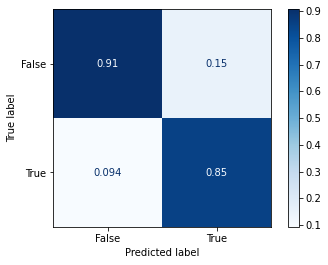

In [143]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

As mentioned in the bonus part, we tried to predict the outlet with the vectors. We tried multiple models to do so. Looking at the performances of the models, one can see that the Logistic Regression fits our data and exploration the best. 